# Principal Components Regression

PCR involves first doing [PCA](https://github.com/AlbinFranzen/Machine-Learning-Portfolio/blob/master/ML%20algorithms%20from%20scratch/Unsupervised%20Learning/Dimensionality%20Reduction/Principal%20Components%20Analysis.ipynb) on the predictors and then fitting a linear regression on the principal components:

In [51]:
# to make this notebook's output stable across runs
import numpy as np
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [52]:
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)
z = 3*x + y + np.random.randn(100,1)

In [54]:
from sklearn.linear_model import LinearRegression
lin_reg1 = LinearRegression()
lin_reg1.fit(data, z)

print("Linear regression RMSE:")
from sklearn.metrics import mean_squared_error
y_pred = lin_reg1.predict(data)
np.sqrt(mean_squared_error(y, y_pred))

Linear regression RMSE:


3.366464281015665

In [43]:
#standardised data
data = np.hstack((x-x.mean(0),y-y.mean(0)))

covariance_matrix = 1/(len(data)-1)*(data-data.mean(0)).T.dot(data-data.mean(0))

eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
w = eig_vecs[:,1]
w = w.reshape((1,2))

proj = data.dot(w.T)

In [44]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(proj, z)

print("PCR RMSE:")
from sklearn.metrics import mean_squared_error
y_pred = lin_reg.predict(proj.reshape(-1,1))
np.sqrt(mean_squared_error(y, y_pred))

PCR RMSE:


3.2676014698410176

In [45]:
X = np.linspace(-5,4,100)
y = lin_reg.predict(X.reshape(-1,1))

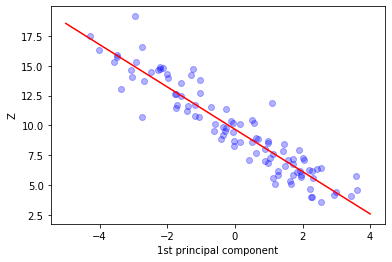

In [46]:
plt.plot(X,y,color="r")
plt.scatter(proj,z,color="b",alpha=0.3)
plt.xlabel("1st principal component")
plt.ylabel("Z")
plt.show()

As we can see in this case we got a slightly better RMSE using PCR because the PCA was able to preserve the variance very well and could reduce noise. However a drawback with PCR is that it is *unsupervised* and only attempts to preserve variance of the data, but it doesn't take into account the variance responsible for the response variable. That is where PLS comes in.

# Partial Least Squares

To compute partial least squares is very simple. One simply uses the values of $\theta$ from a linear regression to create a new line after standardising the predictors:

In [55]:
print(lin_reg1.coef_)

[[3.08025159 0.97281755]]


We simply use $\theta_1$ as the loader:

In [66]:
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)
z = 3*x + y + np.random.randn(100,1)

#standardised data
data = np.hstack(((x-x.mean(0)),y-y.mean(0)))

In [71]:
dim_red = (x-x.mean(0))*lin_reg1.coef_[0][1]+(y-y.mean(0))*lin_reg1.coef_[0][1]

In [72]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(dim_red, z)

print("PLS RMSE:")
from sklearn.metrics import mean_squared_error
y_pred = lin_reg.predict(dim_red.reshape(-1,1))
np.sqrt(mean_squared_error(y, y_pred))

PLS RMSE:


3.597899778813082

In [74]:
X = np.linspace(-5,4,100)
y = lin_reg.predict(X.reshape(-1,1))

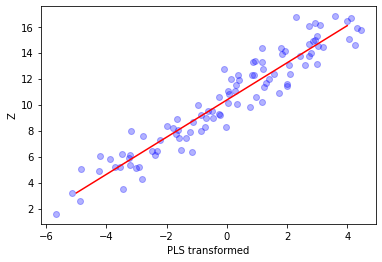

In [75]:
plt.plot(X,y,color="r")
plt.scatter(dim_red,z,color="b",alpha=0.3)
plt.xlabel("PLS transformed")
plt.ylabel("Z")
plt.show()

In this case we got a worse RMSE because the variance in the predictors already matched with the variance in the response variable 